<a href="https://colab.research.google.com/github/Tevan13/analisis-data/blob/main/AnalisisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyek Analisis Data: Bike Sharing Dataset



---


*   Nama : Stevanus Ertito Pramudja
*   Email : ertito_stevanus@yahoo.com
*   Username : stevanusertito


---







## Menentukan Pertanyaan Bisnis

- Pada kurun waktu apa pengguna sepeda lebih sering atau lebih banyak menyewa sepeda?
- Bagaimana trend penyewaan sepeda pada hari kerja dan hari libur?
- Bagaimana temperature, feel likes tempature, dan humidity(kelembapan) dapat mempengaruhi jumlah penyewaaan sepeda?

## LOAD LIBRARY AND PATH DRIVE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from zipfile import ZipFile
from io import BytesIO
import requests

In [ ]:
github_zip_url = 'https://github.com/Tevan13/analisis-data/raw/main/Bike-sharing-dataset.zip'

In [ ]:
response = requests.get(github_zip_url)
zip_file = ZipFile(BytesIO(response.content))

In [ ]:
# Ekstraksi file ZIP
zip_file.extractall('/content/')  # Ganti path ekstraksi sesuai kebutuhan
# Menampilkan nama file yang diekstraksi
zip_file_names = zip_file.namelist()
print(f"Files extracted: {zip_file_names}")

Files extracted: ['Readme.txt', 'day.csv', 'hour.csv']


## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dataset dari file CSV yang diekstraksi
df_day = pd.read_csv('/content/day.csv')  # Ganti dengan path sesuai struktur ZIP
df_hour = pd.read_csv('/content/hour.csv')  # Ganti dengan path sesuai struktur ZIP

# Menyimpan dataset dalam list
list_data = [df_day, df_hour]

In [ ]:
df_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
pd.set_option('display.max_columns', None)
def data_overview(df_hour, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df_hour.shape[0]))
    print('Columns:{}'.format(df_hour.shape[1]))
    print(" MISSING VALUES ".center(125,'-'))
    print(df_hour.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df_hour.duplicated().sum())
    print(" HEAD ".center(125,'-'))
    print(df_hour.head(3))
    print(" DATA TYPES ".center(125,'-'))
    print(df_hour.dtypes)

data_overview(df_hour)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:17379
Columns:17
------------------------------------------------------- MISSING VALUES ------------------------------------------------------
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
------------------------------------------------------------ HEAD -----------------------------------------------------------
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1 

In [ ]:
#Checking ouliers in Target varibale "cnt".

Q1 = df_hour['cnt'].quantile(0.25)
Q3 = df_hour['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df_hour[(df_hour['cnt'] < lower_bound) | (df_hour['cnt'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

### Cleaning Data

Tidak ada missing value & duplicated, sehingga remove outliers saja


In [ ]:
df_hour = df_hour[(df_hour['cnt'] >= lower_bound) & (df_hour['cnt'] <= upper_bound)]
print("shape after outliers removal :",df_hour.shape)

shape after outliers removal : (16874, 17)


Drop kolom yang tidak digunakan berdasarkan pertanyaan bisnis

In [ ]:
drop_col = ['instant']

for i in df_hour.columns:
  if i in drop_col:
    df_hour.drop(labels=i, axis=1, inplace=True)

df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Merubah beberapa kolom, value dan tipe data agar memudahkan analisa data

In [ ]:
df_hour.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'hr': 'hour',
    'temp': 'real_temp',
    'atemp': 'fl_temp', # "Feels Like" temperature
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

df_hour.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,real_temp,fl_temp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_hour['month'] = df_hour['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df_hour['season'] = df_hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
df_hour['weekday'] = df_hour['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
df_hour['weather_cond'] = df_hour['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
df_hour.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,real_temp,fl_temp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_hour['dateday'] = pd.to_datetime(df_hour.dateday)

# Mengubaha tipe data ke categorical
df_hour['season'] = df_hour.season.astype('category')
df_hour['year'] = df_hour.year.astype('category')
df_hour['month'] = df_hour.month.astype('category')
df_hour['hour'] = df_hour.hour.astype('category')
df_hour['holiday'] = df_hour.holiday.astype('category')
df_hour['weekday'] = df_hour.weekday.astype('category')
df_hour['workingday'] = df_hour.workingday.astype('category')
df_hour['weather_cond'] = df_hour.weather_cond.astype('category')

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       16874 non-null  datetime64[ns]
 1   season        16874 non-null  category      
 2   year          16874 non-null  category      
 3   month         16874 non-null  category      
 4   hour          16874 non-null  category      
 5   holiday       16874 non-null  category      
 6   weekday       16874 non-null  category      
 7   workingday    16874 non-null  category      
 8   weather_cond  16874 non-null  category      
 9   real_temp     16874 non-null  float64       
 10  fl_temp       16874 non-null  float64       
 11  hum           16874 non-null  float64       
 12  windspeed     16874 non-null  float64       
 13  casual        16874 non-null  int64         
 14  registered    16874 non-null  int64         
 15  count         16874 non-null  int64 

## Exploratory Data Analysis (EDA)

Eksplorasi data `df_hour` dikarenakan hanya penambahan kolom `hr` atau `hour` didalamnya sehingga kita tidak perlu menggunakan `df_day`

### 1. Kelompokkan data penyewa sepeda berdasarkan waktu yaitu perjam, perhari, perbulan, dan tahun.

In [ ]:
df_hour.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      641   5  284.525000  170715
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     627  10  206.910345  150010
12     642   3  242.828411  172651
13     638  11  239.559490  169129
14     640  12  231.647059  165396
15     640   7  243.256983  174172
16     642  11  305.750696  219529
17     638  15  372.551127  214962
18     642  23  349.410684  209297
19     640  11  304.474790  217395
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

dapat diketahui pada data diatas bahwa rata - rata tertinggi sewa sepeda yaitu pada jam `17.00` sedangkan rata - rata terendahnya adalah jam `04.00`

In [ ]:
df_hour.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
          max min        mean     sum
weekday                              
Fri       642   1  180.949153  437716
Mon       642   1  166.750831  401536
Sat       642   1  177.806610  435804
Sun       640   1  171.730396  424861
Thu       640   1  173.613215  412505
Tue       641   1  170.280524  403054
Wed       641   1  167.648172  398835

kemudian jika berdasarkan hari rata - rata terendah hingga tertinggi penyewa sepeda jika diurutkan maka:
`Monday - Wednesday - Tuesday - Sunday - Thursday - Saturday - Friday`

In [ ]:
df_hour.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
        max min        mean     sum
month                              
Apr     640   1  170.952620  238137
Aug     641   1  211.587900  297281
Dec     636   1  137.320408  201861
Feb     610   1  112.865026  151352
Jan     559   1   94.424773  134933
Jul     633   1  212.324739  304686
Jun     642   1  218.759246  301669
Mar     641   1  141.365344  203142
May     642   1  206.461165  297717
Nov     638   1  169.908192  240590
Oct     642   1  194.328272  268756
Sep     640   1  204.008185  274187

kemudian untuk sewa sepeda perbulannya rata - rata tertinggi yaitu pada bulan `Juli` dan rata - rata terendahnya yaitu pada bulan `Januari`

In [ ]:
df_hour.groupby(by='year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                         
       max min        mean      sum
year                               
0      638   1  143.735770  1242452
1      642   1  203.142041  1671859

kemudian untuk sewa sepeda di tahun `(0:2011)` memiliki rata - rata terendah dibandingkan dengan tahun `(1:2012)`

### 2. Kelompokkan berdasarkan hari kerja atau tidak

In [ ]:
df_hour.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                         
             max min        mean      sum
workingday                               
0            642   1  172.913885   937712
1            642   1  172.613658  1976599

berdasarkan data diatas dapat diketahui bahwa user lebih banyak menyewa sepeda di hari `(0: Libur/Weekend)` di bandingkan di hari `(1:Kerja)`

## 3. Kelompokkan berdasarkan keadaan Cuaca dan Musim

In [ ]:
df_hour.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                         
                      max min        mean      sum
weather_cond                                      
Clear/Partly Cloudy   642   1  185.314247  2042163
Light Snow/Rain       627   1  106.050462   149213
Misty/Cloudy          642   1  162.626463   722712
Severe Weather        164  23   74.333333      223

berdasarkan data diatas diketahui bahwa rata - rata sewa sepeda lebih banyak pada cuaca cerah `Clear/Partly Cloudy` dan rata - rata terendahnya tentu saja pada cuaca buruk `Severe Weather`

In [ ]:
df_hour.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
         max min        mean     sum
season                              
Fall     641   1  211.527687  909146
Spring   623   1  108.410609  457818
Summer   642   1  189.459440  805771
Winter   642   1  180.872195  741576

berdasarkan data diatas dikethaui bahwa rata - rata tertinggi sewa sepeda itu pada musim gugur `Fall` sedangkan pada musim semi `Spring` memiliki rata - rata terendah

4. Bandingkan kedua suhu dan kelembapan terhadap musim

In [ ]:
df_hour.groupby(by='season').agg({
    'real_temp': ['max', 'min', 'mean','sum'],
    'fl_temp': ['max', 'min', 'mean','sum'],
    'hum': ['max', 'min', 'mean','sum']
})

real_temp                          fl_temp                    \
             max   min      mean      sum     max     min      mean   
season                                                                
Fall        1.00  0.38  0.705207  3030.98  1.0000  0.2424  0.655311   
Spring      0.72  0.02  0.297651  1256.98  0.6515  0.0000  0.296727   
Summer      0.94  0.16  0.541557  2303.24  0.8788  0.1667  0.517724   
Winter      0.76  0.14  0.419946  1721.78  0.6818  0.1515  0.412814   

                   hum                           
              sum  max   min      mean      sum  
season                                           
Fall    2816.5269  1.0  0.16  0.638020  2742.21  
Spring  1253.0797  1.0  0.00  0.581684  2456.45  
Summer  2201.8789  1.0  0.16  0.632612  2690.50  
Winter  1692.5387  1.0  0.16  0.670346  2748.42

*   Berdasarkan data diatas rata - rata suhu tertinggi keduanya yaitu pada musim gugur `Fall` sedangkan rata - rata suhu terendahnya pada musim semi `Spring`.
*   Untuk rata - rata kelembapan tertinggi yaitu di musim dingin `Winter` dan rata - rata kelembapan terendah yaitu di musim semi `Spring`.



## Visualization & Explanatory Analysis

### Pada kurun waktu apa pengguna sepeda lebih sering atau lebih banyak menyewa sepeda?

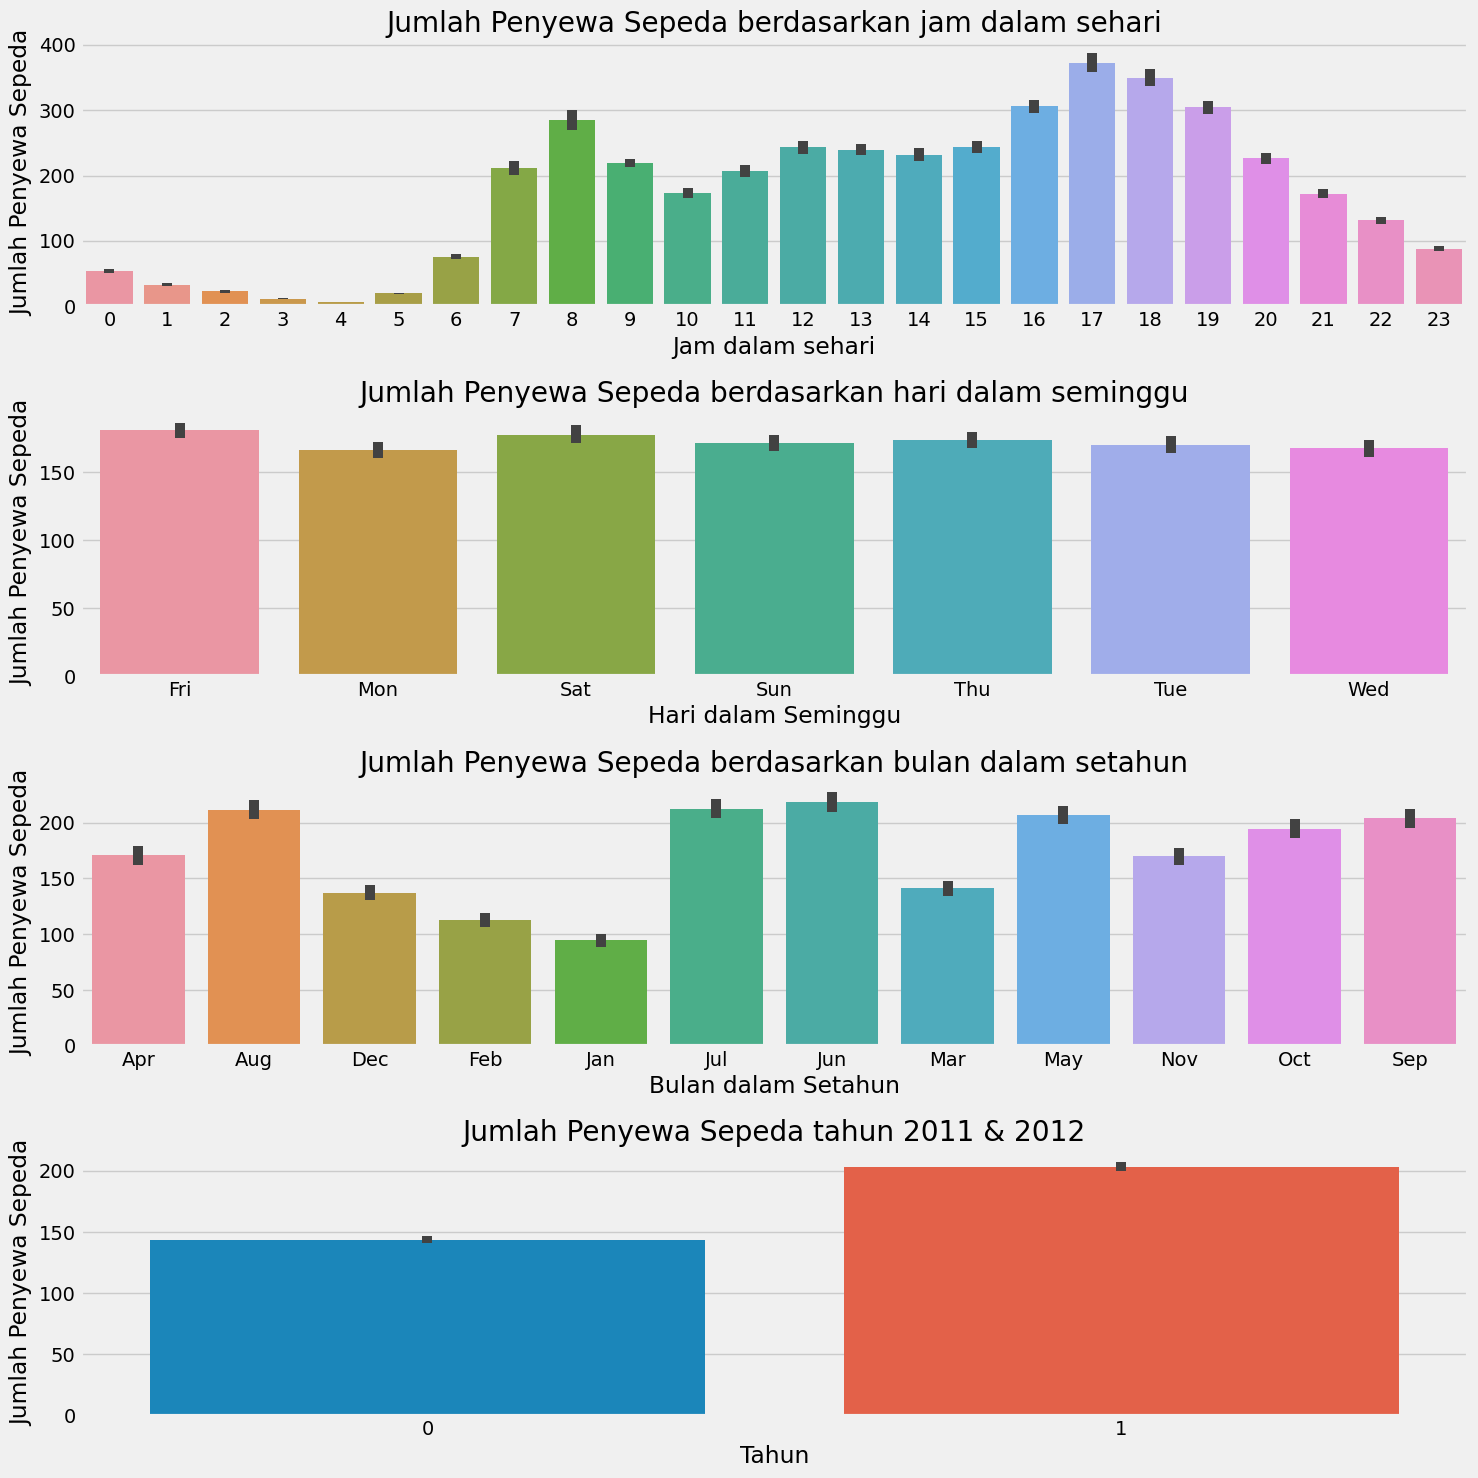

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,15))

# Berdasarkan setiap jamnya
sns.barplot(
    x='hour',
    y='count',
    data=df_hour,
    ax=axes[0])
axes[0].set_title('Jumlah Penyewa Sepeda berdasarkan jam dalam sehari')
axes[0].set_xlabel('Jam dalam sehari')
axes[0].set_ylabel('Jumlah Penyewa Sepeda')

# Berdasarkan setiap harinya
sns.barplot(
  x='weekday',
  y='count',
  data=df_hour,
  ax=axes[1])
axes[1].set_title('Jumlah Penyewa Sepeda berdasarkan hari dalam seminggu')
axes[1].set_xlabel('Hari dalam Seminggu')
axes[1].set_ylabel('Jumlah Penyewa Sepeda')

# Berdasarkan setiap bulannya
sns.barplot(
  x='month',
  y='count',
  data=df_hour,
  ax=axes[2])
axes[2].set_title('Jumlah Penyewa Sepeda berdasarkan bulan dalam setahun')
axes[2].set_xlabel('Bulan dalam Setahun')
axes[2].set_ylabel('Jumlah Penyewa Sepeda')

# Berdasarkan tahun 2011 & 2012
sns.barplot(
  x='year',
  y='count',
  data=df_hour,
  ax=axes[3])
axes[3].set_title('Jumlah Penyewa Sepeda tahun 2011 & 2012')
axes[3].set_xlabel('Tahun')
axes[3].set_ylabel('Jumlah Penyewa Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan boxplot diatas, kita dapat menyimpulkan bahwa penyewaan sepeda lebih sering dan lebih banyak dipesan pada sore hari jam `17.00` di hari `jum'at` kemudian penyewaan sepeda mengalami puncak kenaikan pada bulan ke-6 yaitu bulan `Juni` dan di tahun `2012` penyewa sepeda lebih banyak dibadingkan tahun sebelumnya.

### Bagaimana trend penyewaan sepeda pada hari kerja dan hari libur?

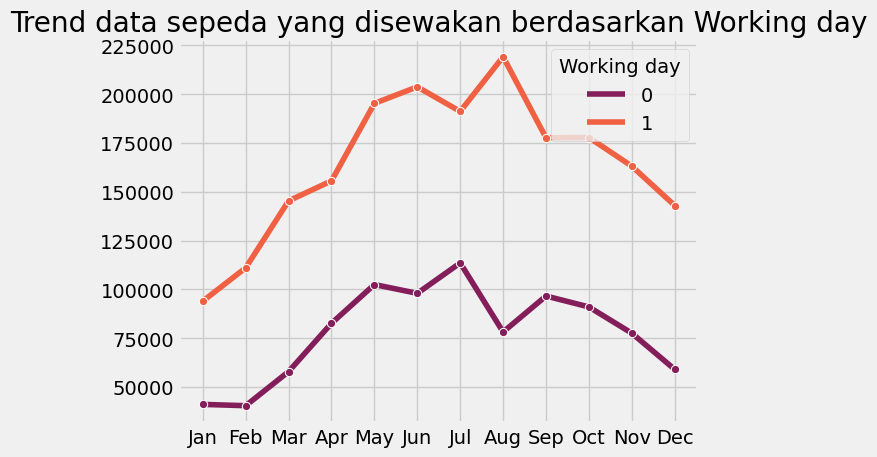

In [ ]:
df_hour['month'] = pd.Categorical(df_hour['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = df_hour.groupby(by=["month","workingday"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="workingday",
    palette="rocket",
    marker="o")

plt.title("Trend data sepeda yang disewakan berdasarkan Working day")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Working day", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas, kita dapat menyimpulkan bahwa jumlah penyewaan sepeda lebih sering dilakukan di `hari kerja (1)` dibandingkan `hari libur/weekend (0)` dimana puncak penyewaan sepeda pada hari kerja yaitu berada pada bulan `Agustus` sedangkan puncak penyewaan sepeda di hari libur/weekend pada bulan `Juli` kemudian pada trend ini kita juga dapat menyimpulkan bahwa penyewaan sepeda mengalami kenaikan hingga pertengahan tahun kemudian mengalami sedikit penurunan hingga akhir tahun.

### Bagaimana temperature, feel likes tempature, dan humidity(kelembapan) dapat mempengaruhi jumlah penyewaaan sepeda?

In [ ]:
df_hour['hum'].head()

0    0.81
1    0.80
2    0.80
3    0.75
4    0.75
Name: hum, dtype: float64

[Text(0.5, 1.0, 'Hubungan antara humidity dengan pengguna sepeda')]

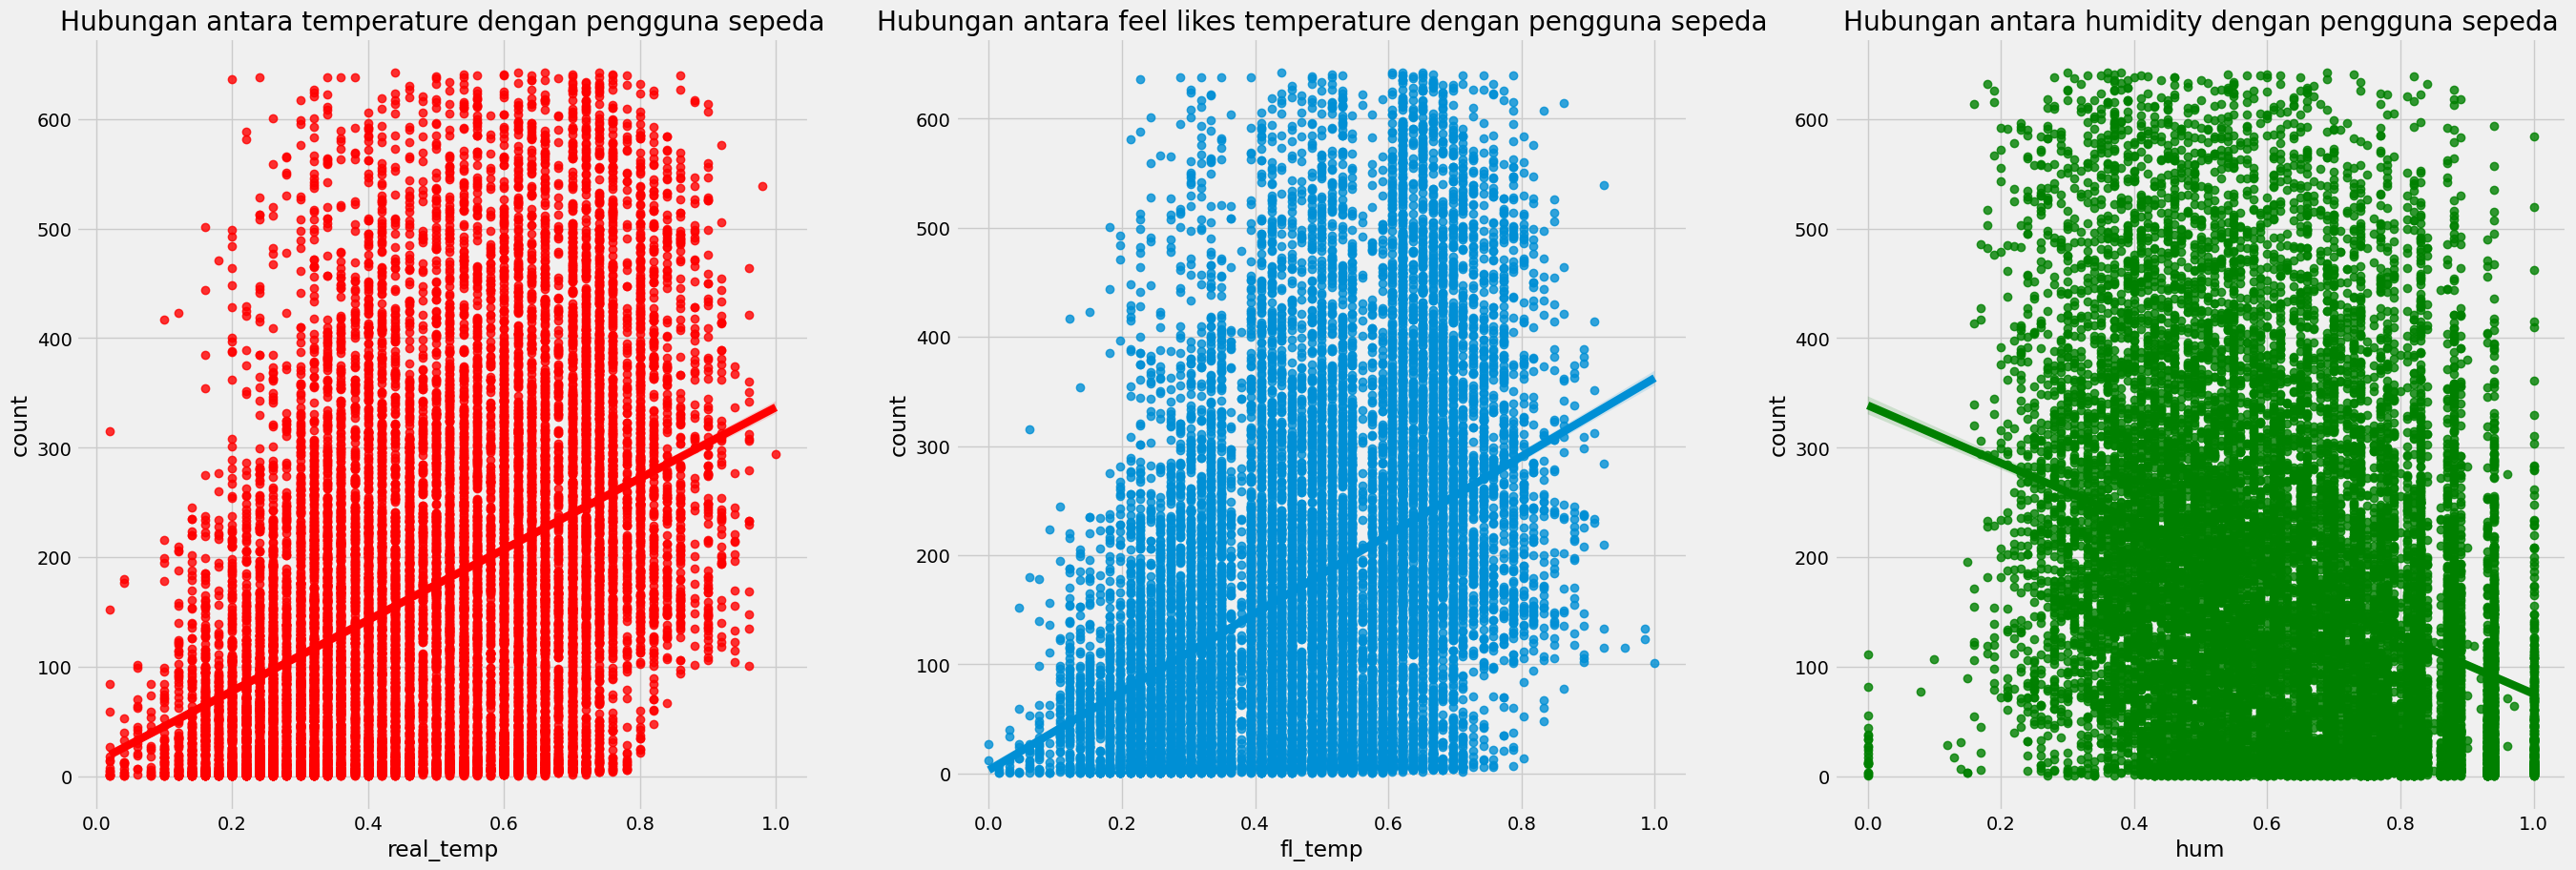

In [ ]:
#Hubungan antara temperature dengan pengguna sepeda
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(30,10))
sns.regplot(x=df_hour['real_temp'], y=df_hour['count'], ax=ax1 ,color='red')
ax1.set(title="Hubungan antara temperature dengan pengguna sepeda")

#Hubungan antara feel likes temperature dengan pengguna sepeda
sns.regplot(x=df_hour['fl_temp'], y=df_hour['count'], ax=ax2)
ax2.set(title="Hubungan antara feel likes temperature dengan pengguna sepeda")

#Hubungan antara humidity dengan pengguna sepeda
sns.regplot(x=df_hour['hum'], y=df_hour['count'], ax=ax3,color='green')
ax3.set(title="Hubungan antara humidity dengan pengguna sepeda")

Berdasarkan hasil scatter plot diatas, dapat diketahui bahwa:


*   Hubungan antara temperature dan jumlah penyewaan sepeda ternyata menunjukan korelasi yang positif diantara keduanya.
*   Hubungan antara feel like temperature dan jumlah penyewaan sepeda ternyata juga menunjukan korelasi yang positif
*   Hubungan antara humidity(kelembapan) dan jumllah penyewaan sepeda ternyata menunjukan korelasi yang sedikit negatif, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu nampak.





## Conclusion



*   Conclusion Pertanyaan 1



Penyewaan sepeda lebih sering dan lebih banyak dipesan pada sore hari jam `17.00` di hari `jum'at` sedangkan pada jam `04.00` jarang user untuk melakukan penyewaan sepeda, kemudian penyewaan sepeda mengalami puncak kenaikan pada bulan ke-6 yaitu bulan `Juni` dan di tahun `2012` penyewa sepeda lebih banyak dibadingkan tahun sebelumnya.




*   Conclusion Pertanyaan 2



Jumlah penyewaan sepeda lebih sering dilakukan di hari kerja dibandingkan hari libur/weekend dimana puncak penyewaan sepeda pada hari kerja yaitu berada pada bulan `Agustus` sekitar ±220000 sedangkan puncak penyewaan sepeda di hari libur/weekend pada bulan `Juli` ±115000 sedangkan penyewaan sepeda pada hari kerja ataupun hari libur memiliki kesamaan yaitu pada bulan `Januari` dimana pada hari kerja hanya sekitar ±90000 saja dan pada hari libur/weekend kurang dari 50000.

Kemudian pada trend ini kita juga dapat menyimpulkan bahwa penyewaan sepeda mengalami kenaikan hingga pertengahan tahun kemudian mengalami sedikit penurunan hingga akhir tahun



*   Conclusion Pertanyaan 3



Dari pernyataan yang telah dipaparkan, dapat disimpulkan bahwa `temperature` dan `feel likes temperature` memiliki korelasi positif dengan jumlah penyewaan sepeda, sehingga jika temperatur (keduanya) meningkat, maka pengguna sepeda juga cenderung meningkat. Sebaliknya dengan Humidity(kelembapan) yang memiliki korelasi negatif dengan jumlah penyewaan sepeda walaupun sangat minim (tidak terlalu signifikan), tetapi tetap dapat menurunkan jumlah penyewaan sepeda ketika humiditynya meningkat.

# Export data yang sudah di processing ke csv untuk dimasukkan ke dalam dashboard

In [ ]:
df_hour.to_csv('bike-sharing.csv', index=False)